In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t
from matplotlib import pyplot as plt

In [2]:
dane = pd.read_csv('analysis_dataset.csv')
linear_model = {'intercept': 0.4155487,
                'slope': 0.9358146}
sigmoid_model = {'L':-1.310175,
                 'I_0': -1.176047,
                 'k': 6.244479}
dane_means = dane.groupby('jitter').agg({'jitter_no': 'mean',
                                         'jitter_value': 'mean',
                                         'jitter_support_log10': 'mean',
                                         'mmn_amp': ['mean', 'std', 'size']}).reset_index()
t_95quant = t.isf(0.025, 34)
standard_error = dane_means[("mmn_amp", "std")]/np.sqrt(dane_means[("mmn_amp", "size")])
dane_means[("mmn_amp","CI95_LL")] = dane_means[("mmn_amp", "mean")] - t_95quant*standard_error
dane_means[("mmn_amp","CI95_UL")] = dane_means[("mmn_amp", "mean")] + t_95quant*standard_error

In [7]:
dane[['p3_amp', 'jitter_support_log10']]

,p3_amp,jitter_support_log10
0,1.565429,-inf
1,1.231154,-inf
2,2.204836,-inf
3,0.278369,-inf
4,0.870474,-inf
...,...,...
275,1.071997,-0.666667
276,-0.562597,-0.666667
277,0.520375,-0.666667
278,1.744470,-0.666667


In [3]:
dane_means.loc[7, ("mmn_amp", "CI95_UL")]

-0.007596107395318241

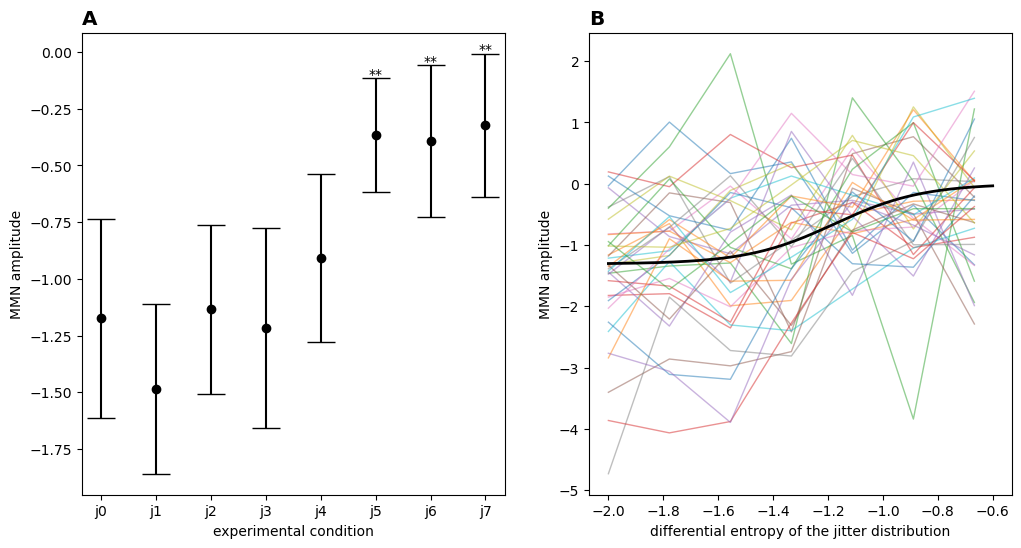

In [4]:
x= np.linspace(-2, -0.6, 1000)
curve_y = sigmoid_model["L"]/(1 + (np.exp(sigmoid_model["k"] * (x - sigmoid_model["I_0"]))))
linear_y = linear_model["intercept"] + linear_model["slope"]*x

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharey=False, sharex=False)
# for pid in dane["pid"].unique():
#     this_data = dane.loc[dane["pid"] == pid, :]
#     ax[0].plot(this_data["jitter"], this_data["mmn_amp"], "o", alpha=0.5, color="gray")
ax[0].errorbar(x=dane_means["jitter"],
               y = dane_means[("mmn_amp", "mean")],
               yerr=t_95quant*standard_error,
               capsize=10,
               fmt="o",
               color="black")
# ax[0].hlines(y=0.02, xmin="j0", xmax="j7", color="gray")
# ax[0].hlines(y=0.02 - 0.05, xmin="j0", xmax="j6", color="gray")
# ax[0].hlines(y=0.02 - 0.11, xmin="j0", xmax="j5", color="gray")
ax[0].annotate("**", xy=("j7", dane_means.loc[7, ("mmn_amp", "CI95_UL")]), ha="center")
ax[0].annotate("**", xy=("j6", dane_means.loc[6, ("mmn_amp", "CI95_UL")]), ha="center")
ax[0].annotate("**", xy=("j5", dane_means.loc[5, ("mmn_amp", "CI95_UL")]), ha="center")
ax[0].set_xlabel("experimental condition")
ax[0].set_ylabel("MMN amplitude")
ax[0].set_title("A", loc="left", fontsize="x-large", fontweight="bold")
for pid in dane["pid"].unique():
    this_data = dane.loc[dane["pid"] == pid, :]
    ax[1].plot(this_data["jitter_support_log10"], this_data["mmn_amp"], "-", alpha=0.5, linewidth=1)
ax[1].plot(x, curve_y, color="black", linewidth=2)
#ax[0].plot(x, linear_y, color="blue")
ax[1].set_xlabel("differential entropy of the jitter distribution")
ax[1].set_ylabel("MMN amplitude")
ax[1].set_title("B", loc="left", fontsize="x-large", fontweight="bold")
plt.show()

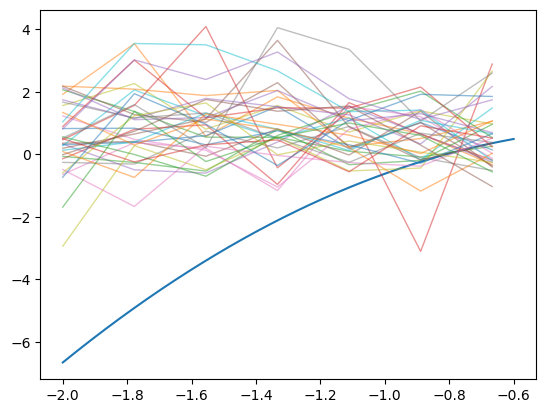

In [10]:
poly([1,2,3],3
     )

/var/folders/z6/6mbwbdvn5djd1zqgp8m_gr240000gn/T/ipykernel_51388/1475216015.py:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.transpose(np.vstack((x**k for k in range(p+1))))


array([[ 7.07106781e-01,  4.08248290e-01],
       [-1.37069821e-16, -8.16496581e-01],
       [-7.07106781e-01,  4.08248290e-01]])

In [11]:
poly(3, 2
     )

/var/folders/z6/6mbwbdvn5djd1zqgp8m_gr240000gn/T/ipykernel_51388/1475216015.py:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.transpose(np.vstack((x**k for k in range(p+1))))


array([], shape=(1, 0), dtype=float64)